In [1]:
import pandas as pd
from pylab import *
from tb_DataReader import EventFeaturesReader

%matplotlib inline
dataDir = "../data/eventFeatures"

In [2]:
# run,backend, channel="219","VME",3
run,backend, channel="230","ubcm",1
ch = EventFeaturesReader(dataDir,"000"+run,backend).getChannel(channel)
ch.pulseIntegral /= 1000

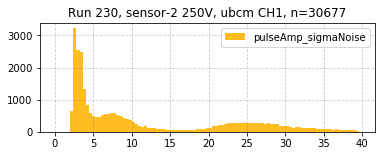

In [9]:
v,a,b,step = 'pulseFWHM',0,20,0.2
v,a,b,step = 'pulseIntegral',-0.2,2,0.03
v,a,b,step = 'pulseMaxSlope',0,30,1
v,a,b,step = 'pulsePos',250,350,2
v,a,b,step = 'pulseAmp',0,100,1
v,a,b,step = 'pulseAmp_sigmaNoise',0,40,0.4


plt.figure(figsize=(6,2),facecolor='w')

plt.hist(ch[v],bins=np.arange(a,b,step),facecolor="#FFBD22",label=v)
plt.grid(linestyle="--",alpha=0.4,color="gray")
plt.legend()

title = "Run {}, sensor-2 {}V, {} CH{}, n={}".format(run, 250,backend,channel, len(ch))
plt.title(title)
plt.savefig("../plots/{}_run{}_{}_{}.png".format(backend,run,channel,v),dpi=300)

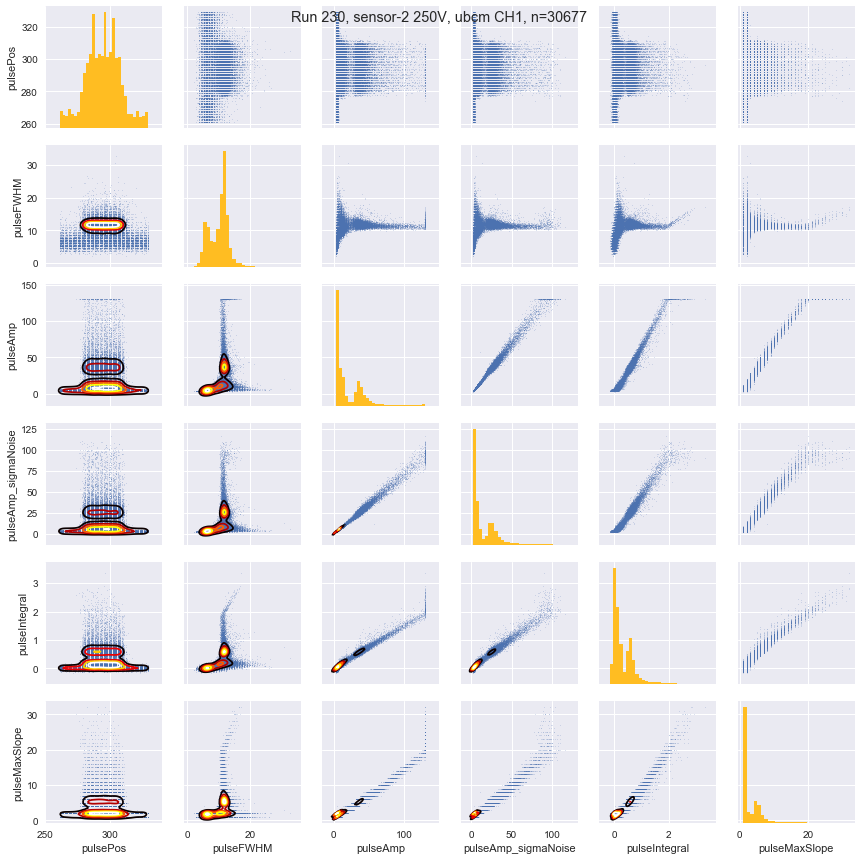

In [10]:
import seaborn as sns; sns.set()
g = sns.PairGrid(ch, vars=["pulsePos","pulseFWHM","pulseAmp","pulseAmp_sigmaNoise","pulseIntegral","pulseMaxSlope"], diag_sharey=False)
g.map_lower(sns.kdeplot, n_levels=5, cmap="hot", shade=False)
g.map_offdiag(plt.scatter, marker =".",alpha=0.3, s=1)
g.map_diag(plt.hist,alpha=1,bins=30,facecolor="#FFBD22")
g.fig.set_size_inches(12,12)

title = "Run {}, sensor-{} {}V, {} CH{}, n={}".format(run,2, 250,backend,channel,len(ch))
g.fig.suptitle(title)

plt.savefig("../plots/{}_run{}_{}.png".format(backend,run,channel),dpi=300)